#Problem Statement

Thyroid is a small, butterfly-shaped gland in the front of your neck. It makes hormones that control the way the body uses energy. These hormones affect nearly every organ in your body and control many of your body's most important functions.

To diagnose thyroid diseases, your health care provider may use a medical history, physical exam, and thyroid tests. In some cases, your provider may also do a biopsy.

Treatment depends on the problem, how severe it is, and what your symptoms are. Possible treatments may include medicines, radioiodine therapy, or thyroid surgery.

Challenge is to diagnose the disease at early as possible.

dataset: https://archive.ics.uci.edu/dataset/102/thyroid+disease

# Thyroid dataset

#challenges and objectives

1. Finding null values in rows and columns.
2. Understanding the dataset with respect to importance of certain aspects of medical terms for the project.
3. Finding techniques for null values to fill and coverting target column in Yes and No as data is less for each category.
4. Finding models as accuracy is at most importance.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.1 MB/s eta 0:00:00


In [ ]:
!pip install xgboost

In [ ]:
!pip install miceforest --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 278.8 MB/s eta 0:00:00


In [ ]:
!pip install kneed

#Installing required Libraries

In [ ]:
#imported all important laibaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score,GridSearchCV
from numpy import mean,std
from imblearn.combine import SMOTETomek
import miceforest as mf
from sklearn.decomposition import PCA
from kneed import KneeLocator
from prettytable import PrettyTable
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#Loading data

In [ ]:
path_data = '/content/drive/MyDrive/Notebook/thyroid0387_data.csv'
path_names = '/content/drive/MyDrive/Notebook/names.csv'

In [ ]:
"""data_df = pd.read_csv(path_data, header=None)
# The header row from names.csv contains the column names except for the last column
names_df = pd.read_csv(path_names)

# Set column names directly from names file
column_names = list(names_df)
# Adding the last column name "Diagnosis"
column_names.append("Diagnosis")

# Assign column names to the DataFrame
data_df.columns = column_names

# Save the DataFrame to a new CSV file
data_df.to_csv('/content/drive/MyDrive/Notebook/thyroid_data_.csv', index=False)"""

'data_df = pd.read_csv(path_data, header=None)\n# The header row from names.csv contains the column names except for the last column\nnames_df = pd.read_csv(path_names)\n\n# Set column names directly from names file\ncolumn_names = list(names_df)\n# Adding the last column name "Diagnosis"\ncolumn_names.append("Diagnosis")\n\n# Assign column names to the DataFrame\ndata_df.columns = column_names\n\n# Save the DataFrame to a new CSV file\ndata_df.to_csv(\'/content/drive/MyDrive/Notebook/thyroid_data_.csv\', index=False)'

In [ ]:
path_df = '/content/drive/MyDrive/Notebook/thyroid_data_.csv'

In [ ]:
df = pd.read_csv(path_df)

In [ ]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Diagnosis
0,29,F,f,f,f,f,f,f,f,t,...,f,?,f,?,f,?,f,?,other,No
1,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,No
2,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,No
3,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,No
4,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S


In [ ]:
df.shape

(9172, 30)

In [ ]:
# Iterating through each column and identifying unique values
placeholder_candidates = {}
for column in df.columns:
    unique_values = df[column].unique()
    placeholder_candidates[column] = unique_values

# Displaing unique values to identify potential placeholders
for column, values in placeholder_candidates.items():
    print(f"Column: {column}")
    print(f"Unique Values: {values}\n")

Column: age
Unique Values: [   29    41    36    32    60    77    28    54    42    51    37    16
    43    63    40    75    56    85    71    67    55    61    46    44
    82    64    70    33    59    53    52    49    35    48    27    69
    76    73    68    66    30    88    38    58    21    45    83    62
    25    86    72    14    15    39    26    20    80    90    23    18
    13    78    24    81    92    57    74     9    47    17    11    50
    34     8    79    31    65    84    12    10    19    22     1     2
    97     6    89    87   455    93     7    91     5    94     4 65511
    95 65512     3 65526]

Column: sex
Unique Values: ['F' 'M' '?']

Column: on thyroxine
Unique Values: ['f' 't']

Column: query on thyroxine
Unique Values: ['f' 't']

Column: on antithyroid medication
Unique Values: ['f' 't']

Column: sick
Unique Values: ['f' 't']

Column: pregnant
Unique Values: ['f' 't']

Column: thyroid surgery
Unique Values: ['f' 't']

Column: I131 treatment
Uniqu

In [ ]:
#replacing all '?' wit nan
df.replace('?', np.nan, inplace=True)

In [ ]:
val = list(df['Diagnosis'].unique())

In [ ]:
val = val[1:len(val)]

In [ ]:
df['Diagnosis']= df['Diagnosis'].replace(val,'Yes')

In [ ]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Diagnosis
0,29,F,f,f,f,f,f,f,f,t,...,f,NaN,f,NaN,f,NaN,f,NaN,other,No
1,29,F,f,f,f,f,f,f,f,f,...,t,128,f,NaN,f,NaN,f,NaN,other,No
2,41,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,11,other,No
3,36,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,26,other,No
4,32,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,36,other,Yes


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        9172 non-null   int64 
 1   sex                        8865 non-null   object
 2   on thyroxine               9172 non-null   object
 3   query on thyroxine         9172 non-null   object
 4   on antithyroid medication  9172 non-null   object
 5   sick                       9172 non-null   object
 6   pregnant                   9172 non-null   object
 7   thyroid surgery            9172 non-null   object
 8   I131 treatment             9172 non-null   object
 9   query hypothyroid          9172 non-null   object
 10  query hyperthyroid         9172 non-null   object
 11  lithium                    9172 non-null   object
 12  goitre                     9172 non-null   object
 13  tumor                      9172 non-null   object
 14  hypopitu

In [ ]:
df.describe()

,age
count,9172.000000
mean,73.555822
std,1183.976718
min,1.000000
25%,37.000000
50%,55.000000
75%,68.000000
max,65526.000000


In [ ]:
df.isnull().sum()

age                             0
sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3 measured                     0
T3                           2604
TT4 measured                    0
TT4                           442
T4U measured                    0
T4U                           809
FTI measured                    0
FTI                           802
TBG measured                    0
TBG                          8823
referral source                 0
Diagnosis     

#Missing and Null values

In [ ]:
#Removing all data where sex is not known
df.dropna(subset=['sex'],inplace=True)
df.reset_index(drop=True, inplace=True)

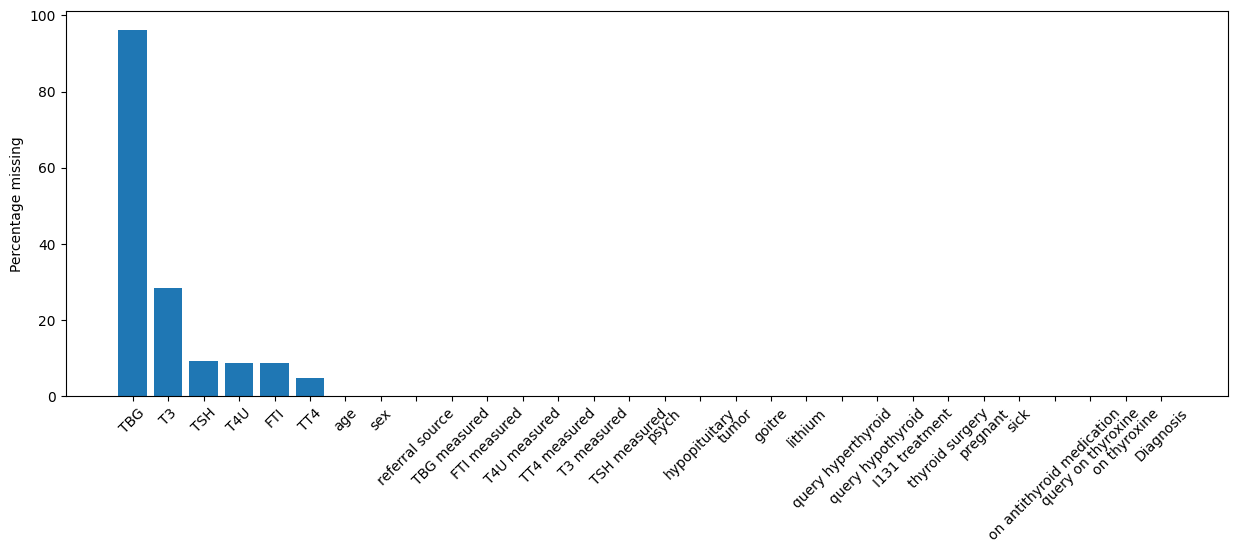

In [ ]:
# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
ax.set_xticks(missing.index,minor=False)
ax.set_xticklabels(labels=missing.index, rotation=45)
plt.ylabel("Percentage missing")
plt.show()

In [ ]:
## Dropping columns which has more than 50% of missing values
dropcols = missing[missing[0]>50]
dropcols

,0
TBG,96.266215


In [ ]:
df.drop(list(dropcols.index), axis=1, inplace=True)

In [ ]:
df.shape

(8865, 29)

In [ ]:
df.isnull().sum()

age                             0
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           813
T3 measured                     0
T3                           2521
TT4 measured                    0
TT4                           420
T4U measured                    0
T4U                           775
FTI measured                    0
FTI                           768
TBG measured                    0
referral source                 0
Diagnosis                       0
dtype: int64

# Missing values percentage after dropping and removing rows

In [ ]:
missing_values_count= df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
print(f"Percentage of total missing cells in the data {(total_missing/total_cells) * 100}%")

Percentage of total missing cells in the data 2.060408036252601%


In [ ]:
df.describe()

,age
count,8865.000000
mean,74.363113
std,1204.292368
min,1.000000
25%,37.000000
50%,55.000000
75%,68.000000
max,65526.000000


In [ ]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'referral source', 'Diagnosis'],
      dtype='object')

#column Transform

In [ ]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Separate numeric and object columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
object_cols = df.select_dtypes(include='object').columns.tolist()

# Print columns
print('We have {} numerical features: {}'.format(len(numeric_cols), numeric_cols))
print('\nWe have {} categorical features: {}'.format(len(object_cols), object_cols))

We have 6 numerical features: ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

We have 23 categorical features: ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured', 'referral source', 'Diagnosis']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8865 entries, 0 to 8864
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        8865 non-null   int64  
 1   sex                        8865 non-null   object 
 2   on thyroxine               8865 non-null   object 
 3   query on thyroxine         8865 non-null   object 
 4   on antithyroid medication  8865 non-null   object 
 5   sick                       8865 non-null   object 
 6   pregnant                   8865 non-null   object 
 7   thyroid surgery            8865 non-null   object 
 8   I131 treatment             8865 non-null   object 
 9   query hypothyroid          8865 non-null   object 
 10  query hyperthyroid         8865 non-null   object 
 11  lithium                    8865 non-null   object 
 12  goitre                     8865 non-null   object 
 13  tumor                      8865 non-null   objec

# Visualization of unique values in Target column

In [ ]:
df.shape

(8865, 29)

Positive: 0, Negative: 6559


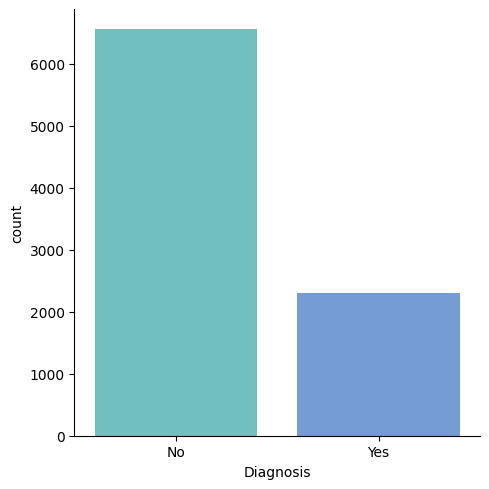

In [ ]:
#checking the target column
yes = df[df['Diagnosis']=='yes'].shape[0]
no = df[df['Diagnosis']=='No'].shape[0]
print("Positive: " + str(yes) + ", Negative: " + str(no))
sns.catplot(data=df, x='Diagnosis', kind="count", palette="winter_r", alpha=.6)
plt.show()

report



*   Target column is highly imbalanced.
*   If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model.



Ways to handle imbalace data.


*   Synthetic Minority Oversampling Technique or SMOTE is another technique to oversample the minority class.
*   SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.



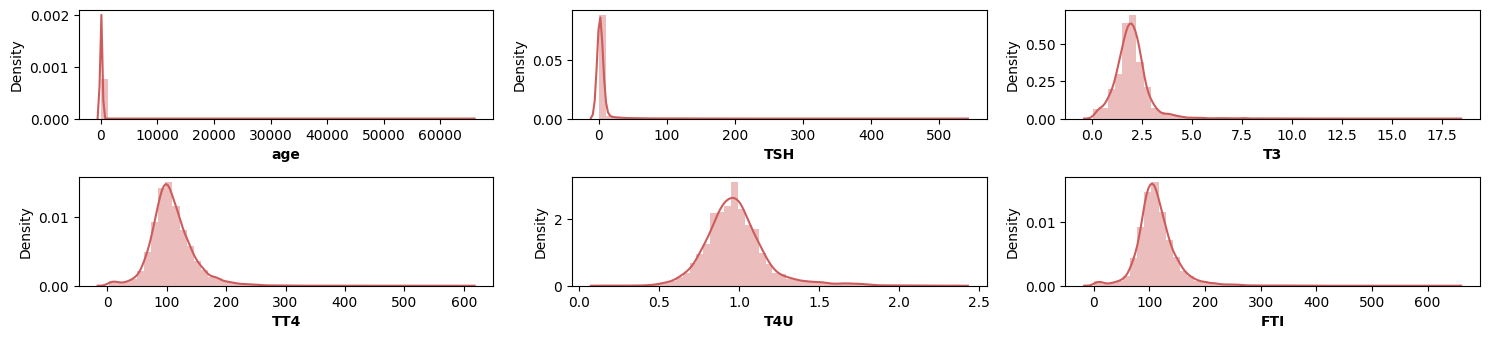

In [ ]:
plt.figure(figsize=(15, 100))
for i, col in enumerate(df[numeric_cols]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

report


*   Numerical data is not normally distributed.
*   Most of columns are categorical columns having binary values, hence no need to go through each column.



# Creating functions for model training and evaluation

In [ ]:
# Function to evaluate scores

def evaluate_clf(y_true,y_pred):
    """
    This function take actual and predicted value.
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score

    """

    acc = accuracy_score(y_true,y_pred) # Calculates accuracy score
    f1 = f1_score(y_true,y_pred) # Calculates f1 score
    precission = precision_score(y_true,y_pred) # Calculates precision score
    recall = recall_score(y_true,y_pred)  # Calculates recall score
    roc_auc = roc_auc_score(y_true,y_pred) #  Calculates roc auc score

    return acc,f1,precission,recall,roc_auc

In [ ]:
def evaluate_model(X,y,models):
    """
    This fuction takes X,y and different models as dictionary.
    It split the dataset into train and test data.
    It iterate through the different models and give metrics.
    Return: Dataframe of models with scores to choose best model.

    """

    # Spliting dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    models_list=[]
    accuracy_list=[]

    for i in range(len(list(models))):
        model=list(models.values())[i]
        model.fit(X_train,y_train)  # Training the model

        # predictions for train and test
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy,model_train_f1,model_train_precission,\
        model_train_recall,model_train_roc_auc = evaluate_clf(y_train,y_train_pred)

        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precission,\
        model_test_recall,model_test_roc_auc = evaluate_clf(y_test,y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print("Model Performance for training set")
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print("- f1: {:.4f}".format(model_train_f1))
        print("- Precision: {:.4f}".format(model_train_precission))
        print("- recall: {:.4f}".format(model_train_recall))
        print("- roc_auc: {:.4f}".format(model_train_roc_auc))

        print("-------------------------------------------------------")

        print("Model Performance for test set")
        print("- Accuracy: {:.4f}".format(model_test_accuracy))
        print("- f1: {:.4f}".format(model_test_f1))
        print("- Precision: {:.4f}".format(model_test_precission))
        print("- recall: {:.4f}".format(model_test_recall))
        print("- roc_auc: {:.4f}".format(model_test_roc_auc))
        accuracy_list.append(model_test_accuracy)
        print("="*40)
        print('\n')

    report = pd.DataFrame(list(zip(models_list,accuracy_list)),columns=['Model_name','Accuracy']).sort_values(by=['Accuracy'],ascending=False)
    return report


# One Hot Encoding

In [ ]:
df_encoded = pd.get_dummies(df, columns=object_cols, drop_first=True)

In [ ]:
df_encoded.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex_M', 'on thyroxine_t',
       'query on thyroxine_t', 'on antithyroid medication_t', 'sick_t',
       'pregnant_t', 'thyroid surgery_t', 'I131 treatment_t',
       'query hypothyroid_t', 'query hyperthyroid_t', 'lithium_t', 'goitre_t',
       'tumor_t', 'hypopituitary_t', 'psych_t', 'TSH measured_t',
       'T3 measured_t', 'TT4 measured_t', 'T4U measured_t', 'FTI measured_t',
       'TBG measured_t', 'referral source_SVHC', 'referral source_SVHD',
       'referral source_SVI', 'referral source_WEST', 'referral source_other',
       'Diagnosis_Yes'],
      dtype='object')

we can use label encoder, binary encoder, one hot encoding etc.

# Evaluating model with different Experiments

In [ ]:
# Splitting X and y
X = df_encoded.drop('Diagnosis_Yes',axis=1)
y = df_encoded['Diagnosis_Yes']

In [ ]:
X.head()

,age,TSH,T3,TT4,T4U,FTI,sex_M,on thyroxine_t,query on thyroxine_t,on antithyroid medication_t,...,T3 measured_t,TT4 measured_t,T4U measured_t,FTI measured_t,TBG measured_t,referral source_SVHC,referral source_SVHD,referral source_SVI,referral source_WEST,referral source_other
0,29,0.3,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,29,1.6,1.9,128.0,NaN,NaN,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
2,41,NaN,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,36,NaN,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,32,NaN,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
X.shape

(8865, 32)

In [ ]:
y.shape

(8865,)

# Experiment 1: Iterative Imputer

#Robust scaler:

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

In [ ]:
# scaling with robust scaler

In [ ]:
rs = RobustScaler()
X_rs = rs.fit_transform(X)
rs_df = pd.DataFrame(X_rs, columns =X.columns)

with strategy median.

#Imputer
The imputer is an estimator used to fill the missing values in datasets. For numerical values, it uses mean, median, and constant.

#Iterative imputer
Multivariate imputer that estimates each feature from all the others. A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

In [ ]:
results=[]
imputer = IterativeImputer(estimator=BayesianRidge(),initial_strategy='median',random_state=42,max_iter=int(i))
strategies = [str(i) for i in range(1,21)]

for s in strategies:
# modelling pipeline
  pipeline = Pipeline(steps=([
      ('i',imputer),
      ('m',RandomForestClassifier())
  ]))
  #evaluate the model
  cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
  scores=cross_val_score(pipeline,X_rs,y,scoring='accuracy',cv=cv,n_jobs=-1)
  #store results
  results.append(scores)
  print("max_iter_%s || accuracy (%.4f) std (%.3f)" % (s,mean(scores),std(scores)))

max_iter_1 || accuracy (0.9528) std (0.007)
max_iter_2 || accuracy (0.9529) std (0.007)
max_iter_3 || accuracy (0.9528) std (0.007)
max_iter_4 || accuracy (0.9531) std (0.006)
max_iter_5 || accuracy (0.9534) std (0.007)
max_iter_6 || accuracy (0.9530) std (0.007)
max_iter_7 || accuracy (0.9528) std (0.007)
max_iter_8 || accuracy (0.9531) std (0.007)
max_iter_9 || accuracy (0.9524) std (0.008)
max_iter_10 || accuracy (0.9526) std (0.007)
max_iter_11 || accuracy (0.9530) std (0.007)
max_iter_12 || accuracy (0.9521) std (0.007)
max_iter_13 || accuracy (0.9528) std (0.006)
max_iter_14 || accuracy (0.9529) std (0.007)
max_iter_15 || accuracy (0.9525) std (0.006)
max_iter_16 || accuracy (0.9528) std (0.007)
max_iter_17 || accuracy (0.9531) std (0.006)
max_iter_18 || accuracy (0.9532) std (0.006)
max_iter_19 || accuracy (0.9520) std (0.007)
max_iter_20 || accuracy (0.9528) std (0.006)


with strategy mean

In [ ]:
results=[]
imputer = IterativeImputer(estimator=BayesianRidge(),initial_strategy='mean',random_state=42,max_iter=int(i))
strategies = [str(i) for i in range(1,21)]

for s in strategies:
# modelling pipeline
  pipeline = Pipeline(steps=([
      ('i',imputer),
      ('m',RandomForestClassifier())
  ]))
  #evaluate the model
  cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
  scores=cross_val_score(pipeline,X_rs,y,scoring='accuracy',cv=cv,n_jobs=-1)
  #store results
  results.append(scores)
  print("max_iter_%s || accuracy (%.4f) std (%.3f)" % (s,mean(scores),std(scores)))

max_iter_1 || accuracy (0.9525) std (0.007)
max_iter_2 || accuracy (0.9536) std (0.007)
max_iter_3 || accuracy (0.9528) std (0.006)
max_iter_4 || accuracy (0.9528) std (0.006)
max_iter_5 || accuracy (0.9526) std (0.007)
max_iter_6 || accuracy (0.9528) std (0.007)
max_iter_7 || accuracy (0.9530) std (0.006)
max_iter_8 || accuracy (0.9527) std (0.006)
max_iter_9 || accuracy (0.9544) std (0.007)
max_iter_10 || accuracy (0.9534) std (0.006)
max_iter_11 || accuracy (0.9534) std (0.007)
max_iter_12 || accuracy (0.9528) std (0.007)
max_iter_13 || accuracy (0.9528) std (0.007)
max_iter_14 || accuracy (0.9524) std (0.006)
max_iter_15 || accuracy (0.9522) std (0.006)
max_iter_16 || accuracy (0.9522) std (0.007)
max_iter_17 || accuracy (0.9532) std (0.007)
max_iter_18 || accuracy (0.9525) std (0.007)
max_iter_19 || accuracy (0.9529) std (0.007)
max_iter_20 || accuracy (0.9530) std (0.006)


we can observe that Iterative Impution with strategy median and max iteration 4 gives highest accuracy.

#Pipeline for IterativeImputer

In [ ]:
im_pipeline = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=4,estimator=BayesianRidge(),initial_strategy='median',random_state=42)),
    ('robustscaler', RobustScaler())
])

In [ ]:
X_im = im_pipeline.fit_transform(X)

#Handling imbalanced data

In [ ]:
#resampling the minority class
smt=SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
#fit to generate the data
X_res,y_res=smt.fit_resample(X_im,y)

#Initializing model in a dictionary

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "support Vector Classifier": SVC(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

fit imputed data for models in dictionary

In [ ]:
report_im = evaluate_model(X_res,y_res,models)

Random Forest
Model Performance for training set
- Accuracy: 0.9966
- f1: 0.9966
- Precision: 0.9960
- recall: 0.9973
- roc_auc: 0.9966
-------------------------------------------------------
Model Performance for test set
- Accuracy: 0.9667
- f1: 0.9670
- Precision: 0.9593
- recall: 0.9747
- roc_auc: 0.9667


Decision Tree
Model Performance for training set
- Accuracy: 0.9966
- f1: 0.9966
- Precision: 0.9971
- recall: 0.9962
- roc_auc: 0.9966
-------------------------------------------------------
Model Performance for test set
- Accuracy: 0.9582
- f1: 0.9583
- Precision: 0.9565
- recall: 0.9602
- roc_auc: 0.9582


Logistic Regression
Model Performance for training set
- Accuracy: 0.7551
- f1: 0.7419
- Precision: 0.7840
- recall: 0.7040
- roc_auc: 0.7551
-------------------------------------------------------
Model Performance for test set
- Accuracy: 0.7456
- f1: 0.7316
- Precision: 0.7748
- recall: 0.6930
- roc_auc: 0.7456


support Vector Classifier
Model Performance for training s

Report for Iterative Imputer with strategy median

In [ ]:
report_im

,Model_name,Accuracy
5,XGBClassifier,0.967816
6,CatBoosting Classifier,0.967816
0,Random Forest,0.966667
1,Decision Tree,0.958238
7,Gradient Boosting,0.947893
4,K-Neighbors Classifier,0.927586
8,AdaBoost Classifier,0.907663
3,support Vector Classifier,0.756322
2,Logistic Regression,0.745594


# Experiment 2: Simple Imputer with startegy mean

#simple imputer
This imputation method is replacing missing values with the mean,median or constant values of the dataset at large, or some similar summary statistic. This has the advantage of being the simplest possible approach, and one that doesn't introduce any undue bias into the dataset.

In [ ]:
# fit the imputer with strategy mean in a pipeline

mean_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',RobustScaler())
])

In [ ]:
#fit X wit mean pipeline
X_mean = mean_pipeline.fit_transform(X)

In [ ]:
#resampling the minority class
smt = SMOTETomek(sampling_strategy='minority',random_state=42)
# fit the model for X and y
X_res,y_res=smt.fit_resample(X_mean,y)

In [ ]:
report_mean = evaluate_model(X_res,y_res,models)

Random Forest
Model Performance for training set
- Accuracy: 0.9967
- f1: 0.9967
- Precision: 0.9962
- recall: 0.9973
- roc_auc: 0.9967
-------------------------------------------------------
Model Performance for test set
- Accuracy: 0.9636
- f1: 0.9638
- Precision: 0.9569
- recall: 0.9709
- roc_auc: 0.9636


Decision Tree
Model Performance for training set
- Accuracy: 0.9967
- f1: 0.9967
- Precision: 0.9973
- recall: 0.9962
- roc_auc: 0.9967
-------------------------------------------------------
Model Performance for test set
- Accuracy: 0.9560
- f1: 0.9555
- Precision: 0.9641
- recall: 0.9471
- roc_auc: 0.9560


Logistic Regression
Model Performance for training set
- Accuracy: 0.7706
- f1: 0.7574
- Precision: 0.8040
- recall: 0.7158
- roc_auc: 0.7706
-------------------------------------------------------
Model Performance for test set
- Accuracy: 0.7619
- f1: 0.7482
- Precision: 0.7925
- recall: 0.7086
- roc_auc: 0.7618


support Vector Classifier
Model Performance for training s

Report for SimpleImputer with strategy mean

In [ ]:
report_mean

,Model_name,Accuracy
6,CatBoosting Classifier,0.969755
5,XGBClassifier,0.965161
0,Random Forest,0.963629
1,Decision Tree,0.955972
7,Gradient Boosting,0.952527
4,K-Neighbors Classifier,0.940658
8,AdaBoost Classifier,0.904288
3,support Vector Classifier,0.812787
2,Logistic Regression,0.761868


#Experiment 3 : Simple Imputer with strategy median

In [ ]:
# fit the imputer with strategy median in a pipeline

mean_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',RobustScaler())
])

In [ ]:
#fit X wit median pipeline
X_median = mean_pipeline.fit_transform(X)

In [ ]:
#resampling the minority class
smt = SMOTETomek(sampling_strategy='minority',random_state=42)
# fit the model for X and y
X_res,y_res=smt.fit_resample(X_median,y)

In [ ]:
report_median = evaluate_model(X_res,y_res,models)

Random Forest
Model Performance for training set
- Accuracy: 0.9961
- f1: 0.9961
- Precision: 0.9952
- recall: 0.9969
- roc_auc: 0.9961
-------------------------------------------------------
Model Performance for test set
- Accuracy: 0.9659
- f1: 0.9667
- Precision: 0.9592
- recall: 0.9744
- roc_auc: 0.9658


Decision Tree
Model Performance for training set
- Accuracy: 0.9961
- f1: 0.9961
- Precision: 0.9977
- recall: 0.9944
- roc_auc: 0.9961
-------------------------------------------------------
Model Performance for test set
- Accuracy: 0.9640
- f1: 0.9643
- Precision: 0.9717
- recall: 0.9570
- roc_auc: 0.9641


Logistic Regression
Model Performance for training set
- Accuracy: 0.7722
- f1: 0.7587
- Precision: 0.8033
- recall: 0.7187
- roc_auc: 0.7720
-------------------------------------------------------
Model Performance for test set
- Accuracy: 0.7574
- f1: 0.7446
- Precision: 0.7993
- recall: 0.6968
- roc_auc: 0.7583


support Vector Classifier
Model Performance for training s

report for Simple Imputer with strategy median

In [ ]:
report_median

,Model_name,Accuracy
5,XGBClassifier,0.973211
6,CatBoosting Classifier,0.967853
0,Random Forest,0.965940
1,Decision Tree,0.964026
7,Gradient Boosting,0.948718
4,K-Neighbors Classifier,0.938385
8,AdaBoost Classifier,0.907769
3,support Vector Classifier,0.784156
2,Logistic Regression,0.757367


# Experiment 4: KNN Imputer

KNN Imputer with weights uniform

#KNN imputer

The KNN Imputer is applied to fill in the missing values in the selected data. The n_neighbors parameter is set to 5, meaning the imputer will use the mean value of the 5 nearest neighbors to impute the missing values.

In [ ]:
results=[]
imputer = KNNImputer(n_neighbors=int(s),weights='uniform')
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]

for s in strategies:
# modelling pipeline
  pipeline = Pipeline(steps=([
      ('i',imputer),
      ('m',RandomForestClassifier())
  ]))
  #evaluate the model
  cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
  scores=cross_val_score(pipeline,X_rs,y,scoring='accuracy',cv=cv,n_jobs=-1)
  #store results
  results.append(scores)
  print("_n_neighbors(uniform)_%s || accuracy (%.4f) std (%.3f)" % (s,mean(scores),std(scores)))

_n_neighbors(uniform)_1 || accuracy (0.9531) std (0.006)
_n_neighbors(uniform)_3 || accuracy (0.9527) std (0.007)
_n_neighbors(uniform)_5 || accuracy (0.9538) std (0.007)
_n_neighbors(uniform)_7 || accuracy (0.9531) std (0.007)
_n_neighbors(uniform)_9 || accuracy (0.9533) std (0.006)
_n_neighbors(uniform)_15 || accuracy (0.9530) std (0.006)
_n_neighbors(uniform)_18 || accuracy (0.9535) std (0.007)
_n_neighbors(uniform)_21 || accuracy (0.9529) std (0.006)


KNN imputer weights distance

In [ ]:
results=[]
imputer = KNNImputer(n_neighbors=int(s),weights='distance')
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]

for s in strategies:
# modelling pipeline
  pipeline = Pipeline(steps=([
      ('i',imputer),
      ('m',RandomForestClassifier())
  ]))
  #evaluate the model
  cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
  scores=cross_val_score(pipeline,X_rs,y,scoring='accuracy',cv=cv,n_jobs=-1)
  #store results
  results.append(scores)
  print("_n_neighbors(uniform)_%s || accuracy (%.4f) std (%.3f)" % (s,mean(scores),std(scores)))

_n_neighbors(uniform)_1 || accuracy (0.9525) std (0.008)
_n_neighbors(uniform)_3 || accuracy (0.9519) std (0.007)
_n_neighbors(uniform)_5 || accuracy (0.9514) std (0.007)
_n_neighbors(uniform)_7 || accuracy (0.9527) std (0.007)
_n_neighbors(uniform)_9 || accuracy (0.9519) std (0.006)
_n_neighbors(uniform)_15 || accuracy (0.9528) std (0.006)
_n_neighbors(uniform)_18 || accuracy (0.9519) std (0.007)
_n_neighbors(uniform)_21 || accuracy (0.9527) std (0.007)


KNN Imputer ith strategy uniform

In [ ]:
knn_imputer=Pipeline(steps=[
    ('imputer',KNNImputer(n_neighbors=5,weights='uniform')),
    ('scaler',RobustScaler())
])

In [ ]:
X_knn = knn_imputer.fit_transform(X)

In [ ]:
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
X_res,y_res = smt.fit_resample(X_knn,y)

In [ ]:
report_knn = evaluate_model(X_res, y_res, models)

Random Forest
Model Performance for training set
- Accuracy: 0.9965
- f1: 0.9964
- Precision: 0.9965
- recall: 0.9963
- roc_auc: 0.9965
-------------------------------------------------------
Model Performance for test set
- Accuracy: 0.9694
- f1: 0.9703
- Precision: 0.9624
- recall: 0.9783
- roc_auc: 0.9692


Decision Tree
Model Performance for training set
- Accuracy: 0.9965
- f1: 0.9964
- Precision: 0.9975
- recall: 0.9954
- roc_auc: 0.9965
-------------------------------------------------------
Model Performance for test set
- Accuracy: 0.9564
- f1: 0.9573
- Precision: 0.9580
- recall: 0.9566
- roc_auc: 0.9564


Logistic Regression
Model Performance for training set
- Accuracy: 0.7626
- f1: 0.7509
- Precision: 0.7854
- recall: 0.7192
- roc_auc: 0.7624
-------------------------------------------------------
Model Performance for test set
- Accuracy: 0.7643
- f1: 0.7556
- Precision: 0.8034
- recall: 0.7131
- roc_auc: 0.7655


support Vector Classifier
Model Performance for training s

report for knn imputer

In [ ]:
report_knn

,Model_name,Accuracy
6,CatBoosting Classifier,0.971691
0,Random Forest,0.969396
5,XGBClassifier,0.968248
1,Decision Tree,0.956389
7,Gradient Boosting,0.947972
4,K-Neighbors Classifier,0.933435
8,AdaBoost Classifier,0.908569
2,Logistic Regression,0.764346
3,support Vector Classifier,0.757842


#Eperiment 5 : MICE for imputaion

#MICE
Multivariate Imputation by Chained Equation (MICE), it is a multiple imputation method wherein each of the missing data are replaced with m values which are obtained from iterating m times (where m > 1 and it normally lies between 3 and 10).

In [ ]:
X_mice = X.copy()

kernel=mf.ImputationKernel(
    X_mice,
    save_all_iterations=True,
    random_state=42
)

In [ ]:
# Rum the mice algoritm for 3 ieration
kernel.mice(3)

In [ ]:
X_mice = kernel.complete_data()

In [ ]:
#Creating pipeline for scaling
mice_pipeline = Pipeline(steps=[
    ('scaler',RobustScaler())
])

In [ ]:
X_mice = mice_pipeline.fit_transform(X_mice)

In [ ]:
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)

X_res,y_res=smt.fit_resample(X_mice,y)

In [ ]:
report_mice = evaluate_model(X_res,y_res,models)

Random Forest
Model Performance for training set
- Accuracy: 1.0000
- f1: 1.0000
- Precision: 1.0000
- recall: 1.0000
- roc_auc: 1.0000
-------------------------------------------------------
Model Performance for test set
- Accuracy: 0.9655
- f1: 0.9645
- Precision: 0.9525
- recall: 0.9768
- roc_auc: 0.9660


Decision Tree
Model Performance for training set
- Accuracy: 1.0000
- f1: 1.0000
- Precision: 1.0000
- recall: 1.0000
- roc_auc: 1.0000
-------------------------------------------------------
Model Performance for test set
- Accuracy: 0.9583
- f1: 0.9565
- Precision: 0.9546
- recall: 0.9584
- roc_auc: 0.9583


Logistic Regression
Model Performance for training set
- Accuracy: 0.7561
- f1: 0.7479
- Precision: 0.7826
- recall: 0.7162
- roc_auc: 0.7565
-------------------------------------------------------
Model Performance for test set
- Accuracy: 0.7515
- f1: 0.7297
- Precision: 0.7617
- recall: 0.7002
- roc_auc: 0.7495


support Vector Classifier
Model Performance for training s

In [ ]:
report_mice

,Model_name,Accuracy
5,XGBClassifier,0.966692
6,CatBoosting Classifier,0.966692
0,Random Forest,0.965544
1,Decision Tree,0.958270
7,Gradient Boosting,0.940276
4,K-Neighbors Classifier,0.925727
8,AdaBoost Classifier,0.890505
3,support Vector Classifier,0.771440
2,Logistic Regression,0.751531


#Experiment 6 : PCA with strategy median

#PCA
PCA is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible.

In [ ]:
pca_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',RobustScaler())
])

In [ ]:
X_pca = pca_pipeline.fit_transform(X)

In [ ]:
#applying pca

var_ratio={}
max_components = min(X_pca.shape[0], X_pca.shape[1])
for n in range(2,max_components):
  pc=PCA(n_components=n)
  df_pca=pc.fit(X_pca)
  var_ratio[n]=sum(df_pca.explained_variance_ratio_)

Variance Plot

<Axes: >

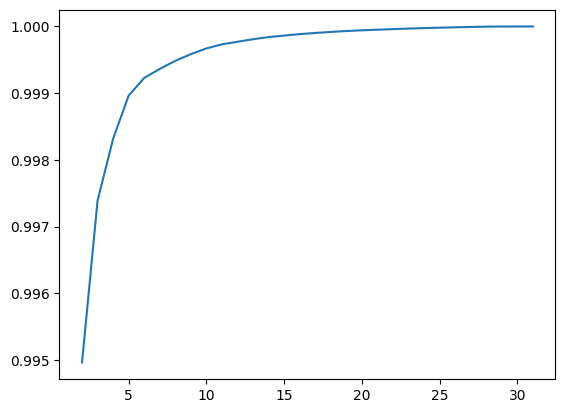

In [ ]:
pd.Series(var_ratio).plot()

Kneed algorithm to find elbow joint

<Figure size 500x500 with 0 Axes>

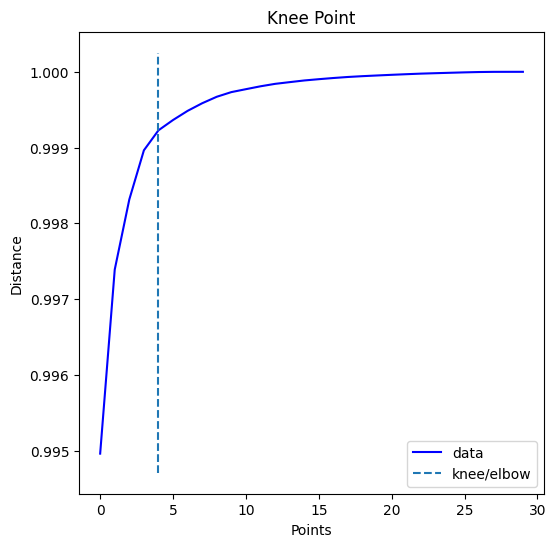

Knee Locator k= 6


In [ ]:
i = np.arange(len(var_ratio))
variance_ratio = list(var_ratio.values())
componenets=list(var_ratio.keys())
knee = KneeLocator(i,variance_ratio,S=1,curve='concave',interp_method='polynomial')

fig = plt.figure(figsize=(5,5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.legend(loc='lower right')
plt.show()
k=componenets[knee.knee]
print('Knee Locator k=',k)


In [ ]:
# dimension reduction

pca_final = PCA(n_components=6,random_state=42)
reduced = pca_final.fit_transform(X_pca)

In [ ]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(reduced, y)

In [ ]:
report_pca = evaluate_model(X_res,y_res,models)

Random Forest
Model Performance for training set
- Accuracy: 0.9962
- f1: 0.9962
- Precision: 0.9950
- recall: 0.9973
- roc_auc: 0.9962
-------------------------------------------------------
Model Performance for test set
- Accuracy: 0.9500
- f1: 0.9511
- Precision: 0.9328
- recall: 0.9700
- roc_auc: 0.9500


Decision Tree
Model Performance for training set
- Accuracy: 0.9962
- f1: 0.9961
- Precision: 0.9971
- recall: 0.9952
- roc_auc: 0.9962
-------------------------------------------------------
Model Performance for test set
- Accuracy: 0.9354
- f1: 0.9361
- Precision: 0.9270
- recall: 0.9455
- roc_auc: 0.9354


Logistic Regression
Model Performance for training set
- Accuracy: 0.7554
- f1: 0.7392
- Precision: 0.7915
- recall: 0.6933
- roc_auc: 0.7554
-------------------------------------------------------
Model Performance for test set
- Accuracy: 0.7546
- f1: 0.7385
- Precision: 0.7917
- recall: 0.6920
- roc_auc: 0.7547


support Vector Classifier
Model Performance for training s

In [ ]:
report_pca

,Model_name,Accuracy
5,XGBClassifier,0.951538
6,CatBoosting Classifier,0.950385
0,Random Forest,0.950000
4,K-Neighbors Classifier,0.942692
1,Decision Tree,0.935385
7,Gradient Boosting,0.917692
8,AdaBoost Classifier,0.890769
3,support Vector Classifier,0.806154
2,Logistic Regression,0.754615


#Experiment 7 : Simple Imputer with startegy contant

In [ ]:
# fit the imputer with strategy constant in a pipeline

constant_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant')),
    ('scaler',RobustScaler())
])

In [ ]:
#fit X with constant pipeline
X_constant = constant_pipeline.fit_transform(X)

In [ ]:
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
X_res,y_res = smt.fit_resample(X_constant,y)

In [ ]:
report_constant = evaluate_model(X_res,y_res,models)

Random Forest
Model Performance for training set
- Accuracy: 0.9963
- f1: 0.9964
- Precision: 0.9956
- recall: 0.9971
- roc_auc: 0.9963
-------------------------------------------------------
Model Performance for test set
- Accuracy: 0.9596
- f1: 0.9598
- Precision: 0.9508
- recall: 0.9691
- roc_auc: 0.9597


Decision Tree
Model Performance for training set
- Accuracy: 0.9963
- f1: 0.9963
- Precision: 0.9975
- recall: 0.9952
- roc_auc: 0.9963
-------------------------------------------------------
Model Performance for test set
- Accuracy: 0.9535
- f1: 0.9534
- Precision: 0.9515
- recall: 0.9552
- roc_auc: 0.9535


Logistic Regression
Model Performance for training set
- Accuracy: 0.7765
- f1: 0.7646
- Precision: 0.8082
- recall: 0.7255
- roc_auc: 0.7765
-------------------------------------------------------
Model Performance for test set
- Accuracy: 0.7623
- f1: 0.7480
- Precision: 0.7926
- recall: 0.7081
- roc_auc: 0.7621


support Vector Classifier
Model Performance for training s

report for Simple Imputer with constant strategy

In [ ]:
report_constant

,Model_name,Accuracy
5,XGBClassifier,0.960000
0,Random Forest,0.959615
6,CatBoosting Classifier,0.959615
1,Decision Tree,0.953462
7,Gradient Boosting,0.938846
4,K-Neighbors Classifier,0.913077
8,AdaBoost Classifier,0.906538
2,Logistic Regression,0.762308
3,support Vector Classifier,0.759615


#Accumulated report

In [ ]:
#creating final table from pretty table.
pt=PrettyTable()
pt.field_names=["Model","Imputation_method","Accuracy"]
pt.add_row(["XGBClassifier","Iterative Impution with median","0.967816"])
pt.add_row(["CatBoosting Classifier","Simple Imputer with mean","0.969755"])
pt.add_row(["XGBClassifier","Simple Imputer with constant","0.960000"])
pt.add_row(["XGBClassifier","Simple Imputer with median","0.973211"])
pt.add_row(["CatBoosting Classifier","KNN with uniform strategy","0.971691"])
pt.add_row(["XGBClassifie","MICE","0.966692"])
pt.add_row(["Random Forest","PCA with strategy median","0.951923"])
print(pt)

+------------------------+--------------------------------+----------+
|         Model          |       Imputation_method        | Accuracy |
+------------------------+--------------------------------+----------+
|     XGBClassifier      | Iterative Impution with median | 0.967816 |
| CatBoosting Classifier |    Simple Imputer with mean    | 0.969755 |
|     XGBClassifier      |  Simple Imputer with constant  | 0.960000 |
|     XGBClassifier      |   Simple Imputer with median   | 0.973211 |
| CatBoosting Classifier |   KNN with uniform strategy    | 0.971691 |
|      XGBClassifie      |              MICE              | 0.966692 |
|     Random Forest      |    PCA with strategy median    | 0.951923 |
+------------------------+--------------------------------+----------+


**Report**

* As per final report "XGBoost" with Simple imputer having strategy median has

  performed well.

#Final Model

In [ ]:
final_model = XGBClassifier()

In [ ]:
#Imputaion and scaling the data
median_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',RobustScaler())
])

In [ ]:
#fit X wit median pipeline
X_median = median_pipeline.fit_transform(X)
#resampling the minority class
smt = SMOTETomek(sampling_strategy='minority',random_state=42)
# fit the model for X and y
X_res,y_res=smt.fit_resample(X_median,y)

In [ ]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [ ]:
final_model = final_model.fit(X_train, y_train)

In [ ]:
y_pred = final_model.predict(X_test)

In [ ]:
print("Final XGBoost Classifier Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final XGBoost Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

Final XGBoost Classifier Accuracy Score (Train) : 0.9925351708297445
Final XGBoost Classifier Accuracy Score (Test) : 0.9732108687332568


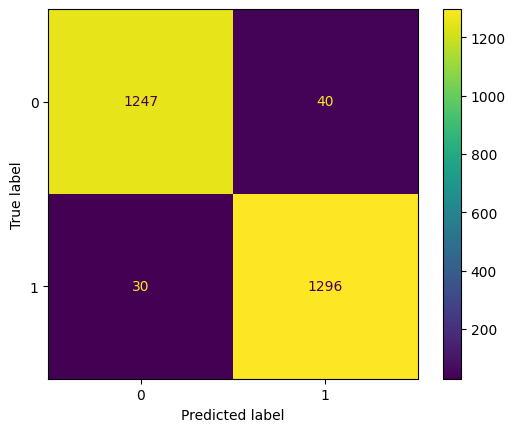

In [ ]:

#plots Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=final_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_model.classes_)
disp.plot()
plt.show()

#Hyperparameter Tuning

In [ ]:
def modelfit(alg,
             dtrain,
             predictors,
             target,
             useTrainCV=True,
             cv_folds=5,
             early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(
            xgb_param,
            xgtrain,
            num_boost_round=alg.get_params()['n_estimators'],
            nfold=cv_folds,
            metrics='auc',
            early_stopping_rounds=early_stopping_rounds,
            verbose_eval = False
        )
        alg.set_params(n_estimators=cvresult.shape[0])

    #Fit the algorithm on the data
    median_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('RobustScaler', RobustScaler())
    ])
    X_median = median_pipeline.fit_transform(dtrain[predictors])
    # Resampling the minority class. The strategy can be changed as required.
    smt = SMOTETomek(random_state=42,sampling_strategy='minority')
    # Fit the model to generate the data.
    X_res, y_res = smt.fit_resample(X_median, dtrain[target])
    alg.fit(X_res, y_res,eval_metric='auc')

    #Predict training set:
    dtrain_predictions = alg.predict(X_res)
    dtrain_predprob = alg.predict_proba(X_res)[:,1]

    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % accuracy_score(y_res, dtrain_predictions))
    print ("AUC Score (Train): %f" % roc_auc_score(y_res, dtrain_predprob))

    feat_imp = alg.get_booster().get_fscore()
    feat_imp_df=pd.DataFrame(list(feat_imp.items()),columns=['Feature', 'Importance'])
    feat_imp_df['Feature'] = feat_imp_df['Feature'].map(lambda x: df_encoded.columns[int(x[1:])])
    feat_imp_df = feat_imp_df.sort_values(by='Importance',ascending=False)

    #plotting features
    plt.figure(figsize=(10,6))
    plt.bar(feat_imp_df['Feature'], feat_imp_df['Importance'])
    plt.title('Feature Importances')
    plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.xticks(rotation=90)
    plt.show()





In [ ]:
predictors = [x for x in df_encoded.columns if x not in ['Diagnosis_Yes']]
target = ['Diagnosis_Yes']
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

Step 1: Fix the learning rate and number of estimators for tuning tree-based parameters.


Model Report
Accuracy : 0.9801
AUC Score (Train): 0.998539


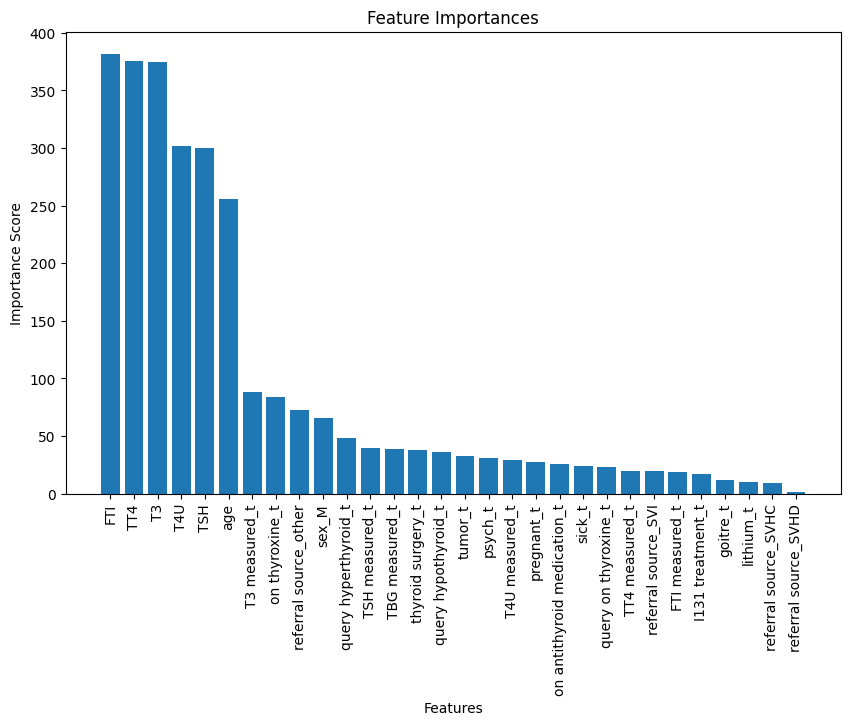

In [ ]:
modelfit(xgb1,dtrain=df_encoded,predictors=predictors,target=target)

Step 2: Tune max_depth and min_child_weight.

In [ ]:
def parameter_tuning(alg,train,predictors,target,param_test):
  #Fit the algorithm on the data
  median_pipeline = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='median')),
  ('RobustScaler', RobustScaler())
  ])
  X_median = median_pipeline.fit_transform(train[predictors])
  # Resampling the minority class. The strategy can be changed as required.
  smt = SMOTETomek(random_state=42,sampling_strategy='minority')
  # Fit the model to generate the data.
  X_res, y_res = smt.fit_resample(X_median, train[target])
  gsearch = GridSearchCV(estimator= alg, param_grid=param_test,scoring='roc_auc',n_jobs=4, cv=5)
  gsearch.fit(train[predictors],train[target])
  return gsearch.cv_results_,gsearch.scorer_, gsearch.best_params_, gsearch.best_score_,gsearch.best_estimator_


In [ ]:
alg=XGBClassifier(learning_rate=0.1, n_estimators=140,
                                                 max_depth=5,min_child_weight=1,
                                                 gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                 objective= 'binary:logistic', nthread=4,
                                                 scale_pos_weight=1, seed=27)
train=df_encoded
predictors=[x for x in df_encoded.columns if x not in ['Diagnosis_Yes']]
target=['Diagnosis_Yes']
param_test={
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

In [ ]:
parameter_tuning(alg,train,predictors,target,param_test)

({'mean_fit_time': array([0.77858009, 1.0311789 , 1.12506528, 1.45962396, 0.99320393,
         0.87260151, 1.17930927, 1.11484694, 1.10276742, 1.41417727,
         1.65924768, 1.5711556 ]),
  'std_fit_time': array([0.17864926, 0.09752105, 0.13188819, 0.20663232, 0.18200879,
         0.01110232, 0.09672519, 0.08593055, 0.06737815, 0.18829998,
         0.42036417, 0.48711677]),
  'mean_score_time': array([0.07561193, 0.09973054, 0.09669147, 0.06931915, 0.05483184,
         0.07346144, 0.07757554, 0.06266055, 0.09229088, 0.07426901,
         0.08449807, 0.05809727]),
  'std_score_time': array([0.0216877 , 0.01944393, 0.02502409, 0.0124302 , 0.01872713,
         0.01845017, 0.01619535, 0.02422703, 0.03300853, 0.02728926,
         0.02458852, 0.05412047]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
         

The paarmeters according to grid search : max_depth = 9 and min child weight = 1

In [ ]:
alg=XGBClassifier(learning_rate=0.1, n_estimators=140,
                                                 max_depth=5,min_child_weight=1,
                                                 gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                 objective= 'binary:logistic', nthread=4,
                                                 scale_pos_weight=1, seed=27)
train=df_encoded
predictors=[x for x in df_encoded.columns if x not in ['Diagnosis_Yes']]
target=['Diagnosis_Yes']
param_test={
    'max_depth':[4,5,6,7],
    'min_child_weight':[4,5,6,7]
}

In [ ]:
parameter_tuning(alg,train,predictors,target,param_test)

({'mean_fit_time': array([1.10795503, 0.99346547, 0.70910225, 0.69449253, 0.88693705,
         0.79915457, 0.80558767, 0.84141212, 1.05346041, 0.95027418,
         1.46021247, 1.32649059, 1.12653737, 1.06597438, 1.1130219 ,
         0.89250765]),
  'std_fit_time': array([0.08396418, 0.19545064, 0.13984813, 0.11347045, 0.09879675,
         0.04645631, 0.06633824, 0.09448713, 0.09819542, 0.10477678,
         0.1239691 , 0.21142755, 0.13404622, 0.08631085, 0.11995947,
         0.13494119]),
  'mean_score_time': array([0.06252623, 0.05003176, 0.06474252, 0.07017045, 0.06712303,
         0.05680246, 0.06402187, 0.06588759, 0.06243367, 0.05685611,
         0.06734095, 0.07796607, 0.0727622 , 0.07254262, 0.08263025,
         0.04396224]),
  'std_score_time': array([0.01623389, 0.01501539, 0.02889161, 0.01738209, 0.00966462,
         0.01192049, 0.01944634, 0.01657036, 0.02154957, 0.00427083,
         0.02564607, 0.0138949 , 0.01352247, 0.01123285, 0.02633468,
         0.02598264]),
  'param_m

Considering max_depth at 7, evaluating min_child_weight

In [ ]:
alg=XGBClassifier(learning_rate=0.1, n_estimators=140,
                                                 max_depth=7,min_child_weight=1,
                                                 gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                 objective= 'binary:logistic', nthread=4,
                                                 scale_pos_weight=1, seed=27)
train=df_encoded
predictors=[x for x in df_encoded.columns if x not in ['Diagnosis_Yes']]
target=['Diagnosis_Yes']
param_test={
    'min_child_weight':[1,2,3,4,5]
}

In [ ]:
parameter_tuning(alg,train,predictors,target,param_test)

({'mean_fit_time': array([1.60822687, 1.36350946, 1.48932076, 1.36918797, 1.25176086]),
  'std_fit_time': array([0.07931758, 0.11003138, 0.05852609, 0.16764498, 0.28850435]),
  'mean_score_time': array([0.07725492, 0.07412629, 0.06353993, 0.09001045, 0.06986728]),
  'std_score_time': array([0.01244557, 0.02908461, 0.02055632, 0.01305741, 0.03262583]),
  'param_min_child_weight': masked_array(data=[1, 2, 3, 4, 5],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_child_weight': 1},
   {'min_child_weight': 2},
   {'min_child_weight': 3},
   {'min_child_weight': 4},
   {'min_child_weight': 5}],
  'split0_test_score': array([0.99287157, 0.99249378, 0.99205399, 0.9918622 , 0.99179772]),
  'split1_test_score': array([0.98965498, 0.98934498, 0.9900584 , 0.98998565, 0.98953428]),
  'split2_test_score': array([0.99534085, 0.99455551, 0.99474565, 0.99466298, 0.99423972]),
  'split3_test_score': array([0.98540752, 0.9

Considering max_depth =7 and min weight child =1, evaluating gamma

In [ ]:
alg=XGBClassifier(learning_rate=0.1, n_estimators=140,
                                                 max_depth=7,min_child_weight=1,
                                                 gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                 objective= 'binary:logistic', nthread=4,
                                                 scale_pos_weight=1, seed=27)
train=df_encoded
predictors=[x for x in df_encoded.columns if x not in ['Diagnosis_Yes']]
target=['Diagnosis_Yes']
param_test={
    'gamma':[i/10.0 for i in range(0,5)]
}

In [ ]:
parameter_tuning(alg,train,predictors,target,param_test)

({'mean_fit_time': array([1.45359483, 1.45594578, 1.48454766, 1.68694224, 1.95930991]),
  'std_fit_time': array([0.24393125, 0.21710827, 0.26837761, 0.2144829 , 0.14699925]),
  'mean_score_time': array([0.0889461 , 0.07746205, 0.07669091, 0.09496808, 0.07775497]),
  'std_score_time': array([0.01157449, 0.04875081, 0.02036451, 0.02899351, 0.03324164]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.99287157, 0.99285504, 0.99306998, 0.99302286, 0.99286909]),
  'split1_test_score': array([0.98965498, 0.98977733, 0.98970871, 0.98996168, 0.98985586]),
  'split2_test_score': array([0.99534085, 0.99513915, 0.99537888, 0.99522429, 0.99523835]),
  'split3_test_score': array([0.98540752, 0.98588038, 0.98551003, 0.98578614, 0.98531824]),

 {'gamma': 0.3,'max_depth': 7, 'min_child_weight': 1} Tuned values till now. Now tuning for subsample and colsample_bytree wit values 0.6,0.7,0.8,0.9

In [ ]:
alg=XGBClassifier(learning_rate=0.1, n_estimators=140,
                                                 max_depth=7,min_child_weight=1,
                                                 gamma=0.3, subsample=0.8, colsample_bytree=0.8,
                                                 objective= 'binary:logistic', nthread=4,
                                                 scale_pos_weight=1, seed=27)
train=df_encoded
predictors=[x for x in df_encoded.columns if x not in ['Diagnosis_Yes']]
target=['Diagnosis_Yes']
param_test={
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}

In [ ]:
parameter_tuning(alg,train,predictors,target,param_test)

({'mean_fit_time': array([1.95660367, 1.36342449, 1.15154281, 1.14062552, 1.19905739,
         1.22927799, 1.20191846, 1.51611633, 1.7021831 , 1.22720494,
         1.24423404, 1.1078793 , 1.21994405, 1.21130619, 1.28472805,
         1.63251309]),
  'std_fit_time': array([0.36449776, 0.15174424, 0.06858492, 0.06857171, 0.13990222,
         0.12412611, 0.12234218, 0.25949983, 0.37569426, 0.09408033,
         0.05149143, 0.05004645, 0.04622484, 0.16869854, 0.06814257,
         0.34328438]),
  'mean_score_time': array([0.09042578, 0.06147032, 0.0635838 , 0.0633409 , 0.06742468,
         0.0660254 , 0.06797442, 0.0787488 , 0.0882606 , 0.06782126,
         0.06412835, 0.06529684, 0.07403698, 0.05958486, 0.0757916 ,
         0.0475183 ]),
  'std_score_time': array([0.00867589, 0.02404877, 0.01293852, 0.02458889, 0.01301305,
         0.01607406, 0.01524862, 0.01145696, 0.01989886, 0.01726876,
         0.01229639, 0.02183175, 0.01668248, 0.01606512, 0.02548442,
         0.01759273]),
  'param_c

{'colsample_bytree': 0.8, 'subsample': 0.9,'gamma': 0.3,'max_depth': 7, 'min_child_weight': 4}

Now , we can try values around 0.05 intervals or around these.

In [ ]:
alg=XGBClassifier(learning_rate=0.1, n_estimators=140,
                                                 max_depth=7,min_child_weight=1,
                                                 gamma=0.3, subsample=0.8, colsample_bytree=0.8,
                                                 objective= 'binary:logistic', nthread=4,
                                                 scale_pos_weight=1, seed=27)
train=df_encoded
predictors=[x for x in df_encoded.columns if x not in ['Diagnosis_Yes']]
target=['Diagnosis_Yes']
param_test={
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

In [ ]:
parameter_tuning(alg,train,predictors,target,param_test)

({'mean_fit_time': array([1.57567258, 1.94326806, 1.63112836, 1.45385056, 1.43825016,
         1.36027627, 1.38779192, 1.53061495, 1.63072414]),
  'std_fit_time': array([0.12923704, 0.20417919, 0.27028892, 0.18370406, 0.14935268,
         0.17073511, 0.20699612, 0.2280429 , 0.43634553]),
  'mean_score_time': array([0.08606892, 0.11178184, 0.10307846, 0.07250075, 0.0653265 ,
         0.06204863, 0.07458334, 0.07795906, 0.06001682]),
  'std_score_time': array([0.01923025, 0.03440601, 0.03198339, 0.03239579, 0.02709398,
         0.0221112 , 0.02122715, 0.02342463, 0.03682359]),
  'param_colsample_bytree': masked_array(data=[0.75, 0.75, 0.75, 0.8, 0.8, 0.8, 0.85, 0.85, 0.85],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.75, 0.8, 0.85, 0.75, 0.8, 0.85, 0.75, 0.8, 0.85],
               mask=[False, False, False, False, False, False, Fals

{'colsample_bytree': 0.8, 'subsample': 0.85,'gamma': 0.3,'max_depth': 7, 'min_child_weight': 1}

 Now, Tuning regularization parameters

In [ ]:
alg=XGBClassifier(learning_rate=0.1, n_estimators=140,
                                                 max_depth=7,min_child_weight=1,
                                                 gamma=0.3, subsample=0.85, colsample_bytree=0.8,
                                                 objective= 'binary:logistic', nthread=4,
                                                 scale_pos_weight=1, seed=27)
train=df_encoded
predictors=[x for x in df_encoded.columns if x not in ['Diagnosis_Yes']]
target=['Diagnosis_Yes']
param_test={
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

In [ ]:
parameter_tuning(alg,train,predictors,target,param_test)

({'mean_fit_time': array([1.5141139 , 1.68332553, 1.94006448, 1.34574509, 0.67792845]),
  'std_fit_time': array([0.10846703, 0.29983665, 0.39011316, 0.11949658, 0.04991664]),
  'mean_score_time': array([0.08973951, 0.11048117, 0.10624166, 0.08476739, 0.0573061 ]),
  'std_score_time': array([0.02208541, 0.00501097, 0.03536778, 0.01542046, 0.01975656]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([0.99298566, 0.992798  , 0.99268805, 0.99272939, 0.98322592]),
  'split1_test_score': array([0.99069824, 0.99052299, 0.99050315, 0.99026093, 0.97972908]),
  'split2_test_score': array([0.99523091, 0.99522595, 0.99516312, 0.99509368, 0.98439815]),
  'split3_test_score': array([0.98567371, 0.98562659, 0.98586302,

In [ ]:
alg=XGBClassifier(learning_rate=0.1, n_estimators=140,
                                                 max_depth=7,min_child_weight=1,
                                                 gamma=0.3, subsample=0.85, colsample_bytree=0.8,
                                                 objective= 'binary:logistic', reg_alpha=0.1,nthread=4,
                                                 scale_pos_weight=1, seed=27)
train=df_encoded
predictors=[x for x in df_encoded.columns if x not in ['Diagnosis_Yes']]
target=['Diagnosis_Yes']
param_test={
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05,0.1]
}

In [ ]:
parameter_tuning(alg,train,predictors,target,param_test)

({'mean_fit_time': array([1.3172965 , 1.40646811, 1.72749767, 2.00052123, 1.48584571,
         1.05876479]),
  'std_fit_time': array([0.0966182 , 0.12967385, 0.20199811, 0.13809624, 0.11455557,
         0.22548764]),
  'mean_score_time': array([0.10382285, 0.09421372, 0.11747861, 0.10941443, 0.06796398,
         0.04061651]),
  'std_score_time': array([0.02596092, 0.00548826, 0.02774862, 0.03666651, 0.01684733,
         0.01941297]),
  'param_reg_alpha': masked_array(data=[0, 0.001, 0.005, 0.01, 0.05, 0.1],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0},
   {'reg_alpha': 0.001},
   {'reg_alpha': 0.005},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.05},
   {'reg_alpha': 0.1}],
  'split0_test_score': array([0.99308155, 0.99307411, 0.99340643, 0.992798  , 0.99279635,
         0.99268805]),
  'split1_test_score': array([0.99069824, 0.990604  , 0.99051968, 0.99052299, 0.99056598,
         0.99

'reg_alpha': 0.005,'colsample_bytree': 0.8, 'subsample': 0.85,'gamma': 0.3,'max_depth': 7, 'min_child_weight': 1

Now checking for learning rate

In [ ]:
alg=XGBClassifier(learning_rate=0.1, n_estimators=140,
                                                 max_depth=7,min_child_weight=1,
                                                 gamma=0.3, subsample=0.85, colsample_bytree=0.8,
                                                 objective= 'binary:logistic', reg_alpha=0.005,nthread=4,
                                                 scale_pos_weight=1, seed=27)
train=df_encoded
predictors=[x for x in df_encoded.columns if x not in ['Diagnosis_Yes']]
target=['Diagnosis_Yes']
param_test={
 'learning_rate':[0,1e-5, 1e-2, 0.001, 0.005, 0.01, 0.05,0.1,1,5,50, 100]
}

In [ ]:
parameter_tuning(alg,train,predictors,target,param_test)

({'mean_fit_time': array([1.9068326 , 1.44732409, 2.2700016 , 1.93174682, 1.51216087,
         1.51120081, 1.46488748, 1.38618283, 0.97169065, 0.65723248,
         0.60225377, 0.4844171 ]),
  'std_fit_time': array([0.31377872, 0.03987861, 0.6282943 , 0.45780767, 0.08105937,
         0.13788701, 0.05381364, 0.15772182, 0.19129229, 0.10882002,
         0.12159859, 0.17888522]),
  'mean_score_time': array([0.07601252, 0.07769575, 0.13269987, 0.1093195 , 0.09136252,
         0.09437642, 0.08843689, 0.08226719, 0.06635861, 0.06801085,
         0.05994568, 0.0301404 ]),
  'std_score_time': array([0.0158237 , 0.01512676, 0.07434429, 0.0226708 , 0.0275363 ,
         0.02211022, 0.03904468, 0.03607307, 0.03621253, 0.0073789 ,
         0.01467608, 0.01706805]),
  'param_learning_rate': masked_array(data=[0, 1e-05, 0.01, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 5,
                     50, 100],
               mask=[False, False, False, False, False, False, False, False,
                     False, False

#Final Tuned Model

In [ ]:
predictors = [x for x in df_encoded.columns if x not in ['Diagnosis_Yes']]
target = ['Diagnosis_Yes']
xgb1 = XGBClassifier(learning_rate=0.1, n_estimators=1000,
                                                 max_depth=7,min_child_weight=1,
                                                 gamma=0.3, subsample=0.85, colsample_bytree=0.8,
                                                 objective= 'binary:logistic', reg_alpha=0.005,nthread=4,
                                                 scale_pos_weight=1, seed=27)


Model Report
Accuracy : 0.9785
AUC Score (Train): 0.998497


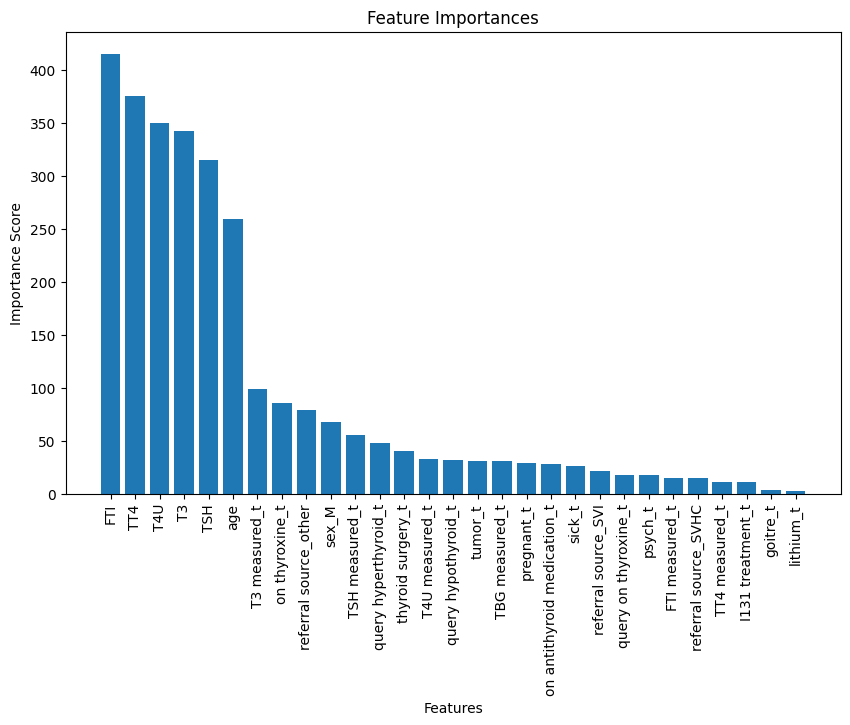

In [ ]:
modelfit(xgb1,dtrain=df_encoded,predictors=predictors,target=target)

report


*   Xgboost model is best model.
*   We can check for better parameters for tuning the model, we are already getting 97.85 % accuracy so moving forward.
*   We can start modular coding and deplo the model.



##The best Model is XGBoost Classifier with 97.85% accuracy.